In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# Data Wrangling

In [2]:
#import dependencies 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read in the data
heart_df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
#View the first 5 lines
display(heart_df.head())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#shape of the df
display(heart_df.shape)
display(sat_df.shape)

(303, 14)

NameError: name 'sat_df' is not defined

In [ ]:
#summary information of the dataset
heart_df.info()

In [ ]:
#summary statistics of the df
heart_df.describe()

In [ ]:
#check for duplicate
heart_df[heart_df.duplicated()]

In [6]:
# Remove duplicates
heart_df.drop_duplicates(inplace = True)

In [7]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# EXPLORATORY DATA ANALYSIS
### __Distribution of Feature of interest__

In [41]:
#Define function for figsize
def figsize(width, height):
    plt.figure(figsize=[width, height])
    
#Define function for title, y_axis label and x_axis label.
def labels(title, x_axis, y_axis):
    plt.title(title, fontsize = 16)
    plt.ylabel(y_axis, fontsize = 14)
    plt.xlabel(x_axis, fontsize = 14)

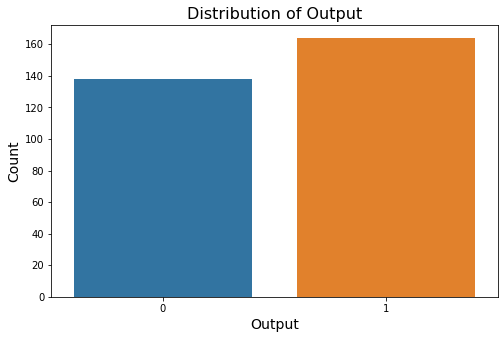

In [42]:
figsize(8,5)
sns.countplot(x=heart_df.output)
labels("Distribution of Output", "Output", "Count");

### __Correlation between the output and other features.__

* Categorical features and Output

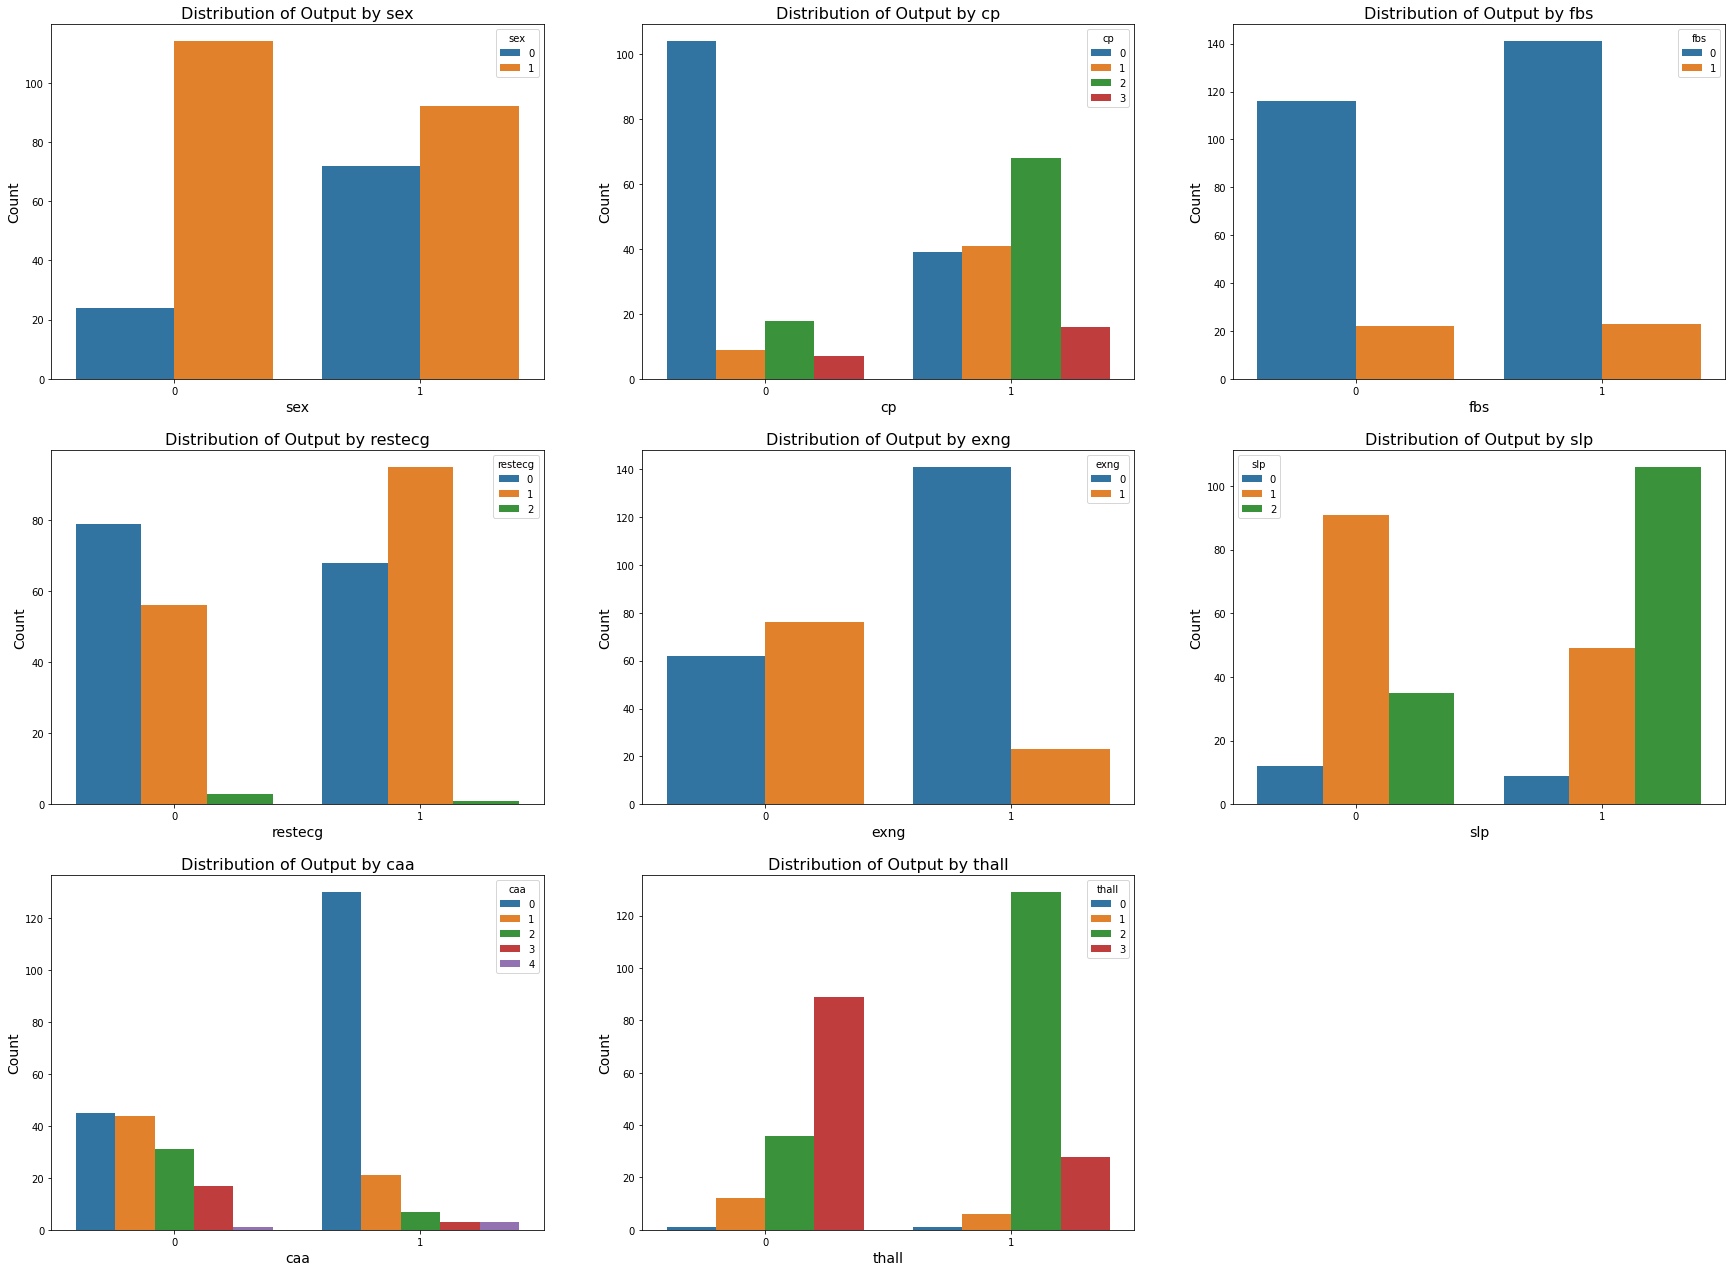

In [43]:
#Subplot function
def splot(index, row, column):
    plt.subplot(index, row, column)

figsize(30,30)
list_col = list(heart_df.columns)
indices = 0,3,4,7,9,13
list_col1 = [i for j, i in enumerate(list_col) if j not in indices]

i = 1
for col in list_col1:
    splot(4, 3, i)
    sns.countplot(x=heart_df.output, hue=heart_df[col]);
    labels(f"Distribution of Output by {col}", f"{col}", "Count");
    i= i+1
    

## Observations
- Patients belonging to the sex group 1 are less prone to attack
- Chest Pain type 3 (non-anginal pain) does not have much effect on heart attack and most of people with type have less chance of heart attack
- Patient with low (<120mg/dl)fasting blood sugar tend to have more chance of heart attack.
- Patients with having ST-T wave abnormality in resting electrocardiographic results (restecg) have more chance of heart attack
- Patients with no exercise induced angina (exng) are more prone to heart attack
- Patients with no major vessels are more likely to heart attack.
- Patients with thall rate 2 are more prone to heart attack.

* numerical features and Output

In [44]:
list_col2 = [i for j, i in enumerate(list_col) if j in indices]

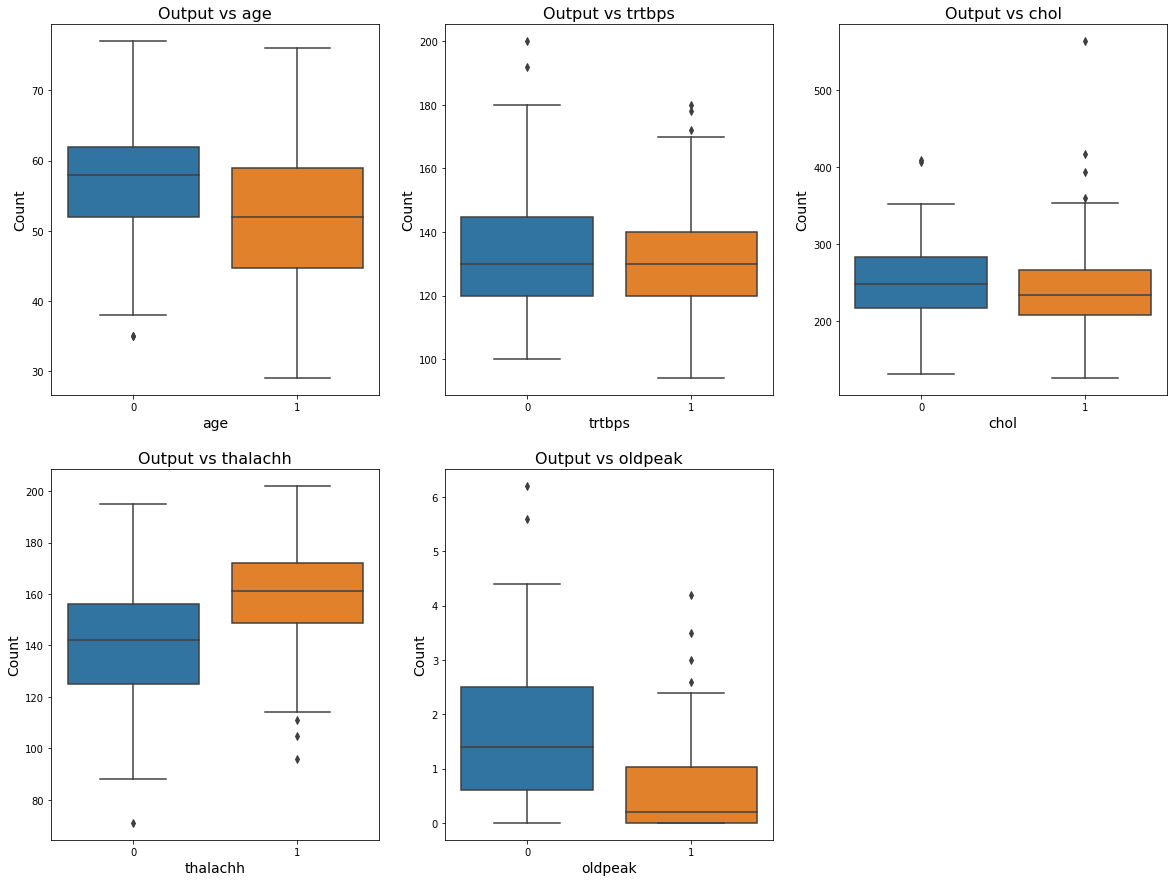

In [45]:
figsize(20,15)
indices = 0,3,4,7,9
list_col2 = [i for j, i in enumerate(list_col) if j in indices]

sns.boxplot(data=heart_df, x='output', y= f'{col}');
i = 1
for col in list_col2:
    splot(2, 3, i)
    sns.boxplot(data=heart_df, x='output', y= col);
    labels(f"Output vs {col}", f"{col}", "Count");
    i= i+1

## Observations
- The median age of patients that are more prone to heart attack is suprisingly smaller than those that are have less chance of heart attack.
- Patients with high resting blood pressure (in mm Hg) tend to have less chance of heart attack
- The median level of cholesterol is lower in patients with high chance of heart attack than in patients with less heart attack chance.
- Patients with maximum heart rate have more chance of heart attack.
- 

# Machine Learning - Logistic regression

In [8]:
#drop the target feature(output) to compute the input features (X)
X = heart_df.drop("output", axis=1).values
X.shape

(302, 13)

In [9]:
#target feature
y = heart_df.output.values
y.shape

(302,)

In [10]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Training the model

In [11]:
#import loistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
#fit the model
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [13]:
#score the model on train set
model.score(X_train, y_train)

0.8755186721991701

## Evaluating the model - Accuracy

In [52]:
#score on test set
model.score(X_test, y_test)

0.8524590163934426

In [14]:
#Checking for imbalance in the output class
heart_df.output.value_counts(normalize=True)

1    0.543046
0    0.456954
Name: output, dtype: float64

## Hyperparameter Tuning - GridSearchCV

In [15]:
#import gridsearchCV
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()

parameters = {"penalty":["l1", "l2"], "max_iter":[100, 1000, 10000]}

In [16]:
grid_model = GridSearchCV(model, parameters, cv=5)
grid_model.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2']})

In [17]:
display(grid_model.best_params_)

best_score = grid_model.best_score_
display(best_score)

{'max_iter': 1000, 'penalty': 'l2'}

0.8343715846994535

In [18]:
#make predicions on test set
predictions = grid_model.predict(X_test)

## Model Evaluation - Confusion Matrix

In [19]:
from sklearn import metrics

In [20]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[24  5]
 [ 4 28]]


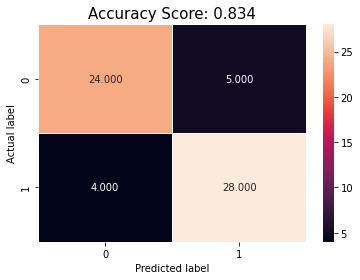

In [21]:
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(best_score,3))
plt.title(all_sample_title, size = 15);